# **Model Analysis, Linear**

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import pearsonr

## Differential

In [2]:
# parameter statistics
RAll = pd.read_csv('../Outputs/Lmfit_RHM_Dif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'BIC', 'R^2']

print('Average RHM Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_Linear_Dif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Baseline', 'Forgetting Factor', 'Linear Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))


Average RHM Weights
Certain Reward Mean: 0.0826981823293739
Certain Reward Median: 0.05
Certain Reward SD: 0.2721054511885474
Expected Value Mean: 0.062288296551912564
Expected Value Median: 0.0446535980942244
Expected Value SD: 0.19186145659008486
Prediction Error Mean: 0.1465394657905744
Prediction Error Median: 0.10578336142379345
Prediction Error SD: 0.19770451535617808
Forgetting Factor Mean: 0.5053428639810214
Forgetting Factor Median: 0.5400434919699166
Forgetting Factor SD: 0.339249307827832
BIC Mean: 50.94508076800851
BIC Median: 50.81957173184084
BIC SD: 18.800774231763214
R^2 Mean: 0.596217058736573
R^2 Median: 0.632862571730459
R^2 SD: 0.22995536514820927


Average DynAffect-C Weights
Certain Reward Mean: 0.06421633509814513
Certain Reward Median: 0.05
Certain Reward SD: 0.2462724997394914
Expected Value Mean: 0.05039132606647593
Expected Value Median: 0.034032038659581945
Expected Value SD: 0.16487478730010685
Prediction Error Mean: 0.11521565776845062
Prediction Error Med

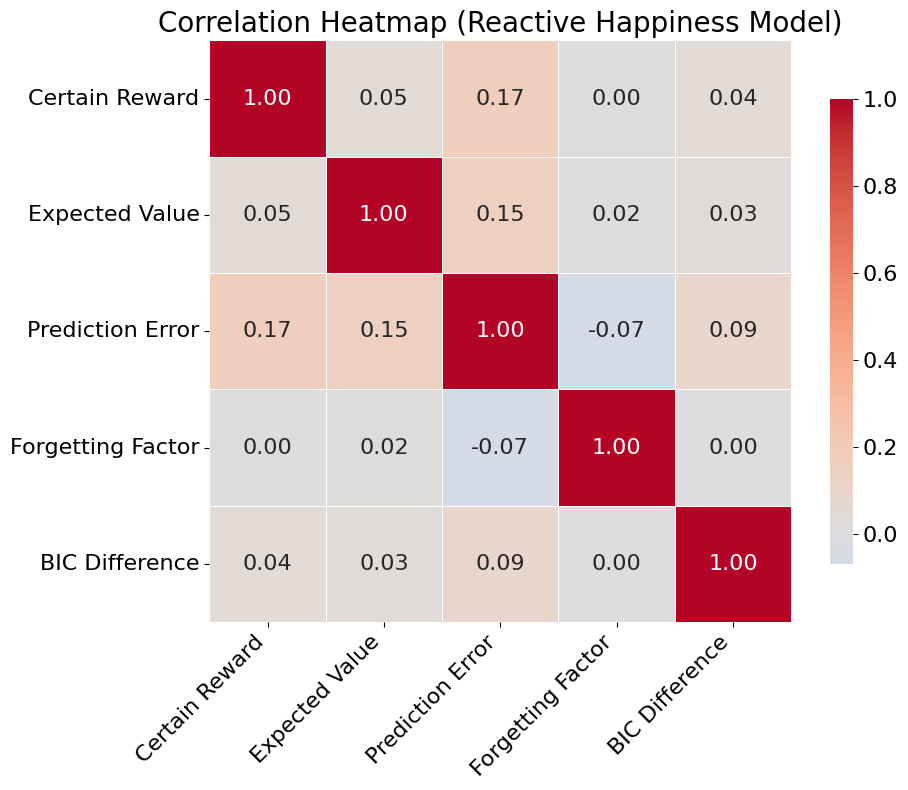

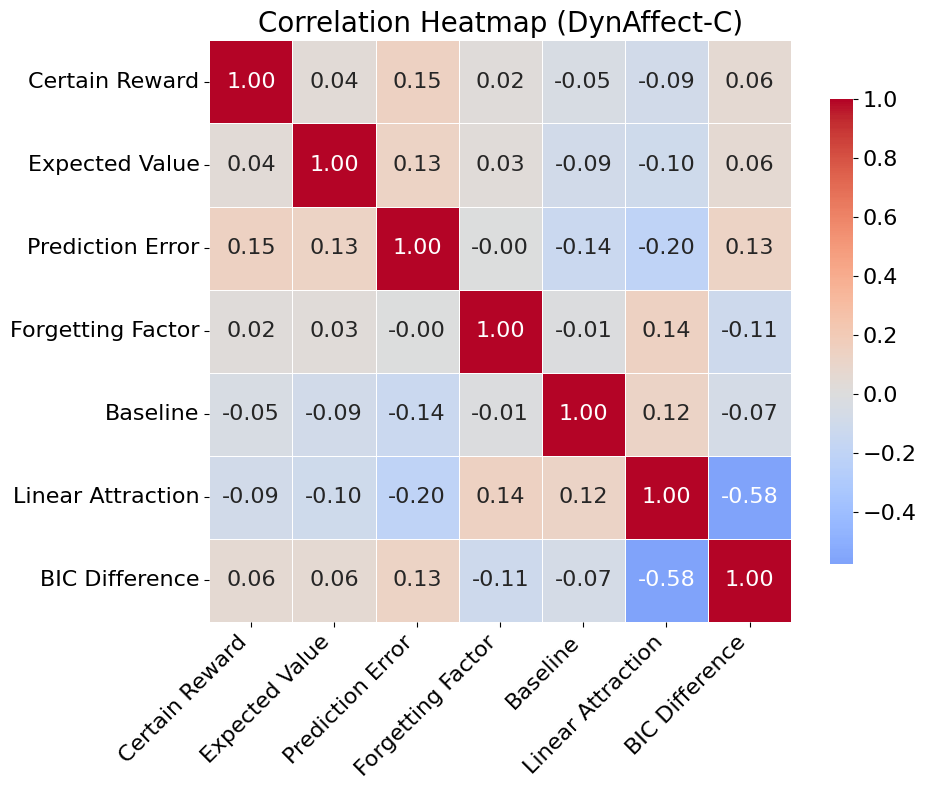

In [3]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation/p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval

    return corr_matrix, pval_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_linear.png', dpi=1200)
    plt.show()
    
# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'BIC Difference']
corr_matrix_rall, _, = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'BIC Difference']
corr_matrix_dcall, _, = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")

Forgetting factor difference:  TtestResult(statistic=-33.30265608842615, pvalue=1.8050685424034572e-234, df=14629)


Text(0.5, 1.0, 'Forgetting Factor vs Linear Attraction Correlation')

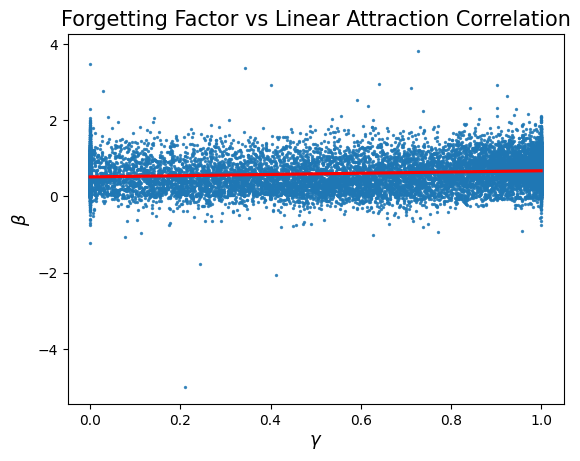

In [4]:
# forgetting factor analysis

print('Forgetting factor difference: ', stat.ttest_rel(RAll['Forgetting Factor'], DCAll['Forgetting Factor']))

sns.regplot(y=DCAll['Linear Attraction'], x=DCAll['Forgetting Factor'], line_kws={'color': 'red'}, scatter_kws={'s':2})
plt.xlabel(r'$\gamma$', fontsize=13)
plt.ylabel(r'$\beta$', fontsize=13)
plt.title('Forgetting Factor vs Linear Attraction Correlation', fontsize=15)

In [5]:
# calculate effect sizes

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
cubic = pd.read_csv('../Outputs/Lmfit_DC_Dif.csv')
print(f"Cohen's d (change in forgetting factor vs RHM): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
print(f"Cohen's d (change in BIC vs Cubic DynAffect-C): {cohen_d(DCAll['BIC'], cubic['BIC']):.3f}")
print(f"Cohen's d (change in variance explained): {cohen_d(DCAll['R^2'], RAll['R^2']):.3f}")

BIC Difference:  TtestResult(statistic=-43.11868923795687, pvalue=0.0, df=14629)
Forgetting Factor:  TtestResult(statistic=33.30265608842615, pvalue=1.8050685424034572e-234, df=14629)
Cohen's d (change in forgetting factor vs RHM): 0.250
Cohen's d (change in BIC vs Cubic DynAffect-C): -0.002
Cohen's d (change in variance explained): 0.922


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_54889/2048969608.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_54889/2048969608.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_54889/2048969608.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined

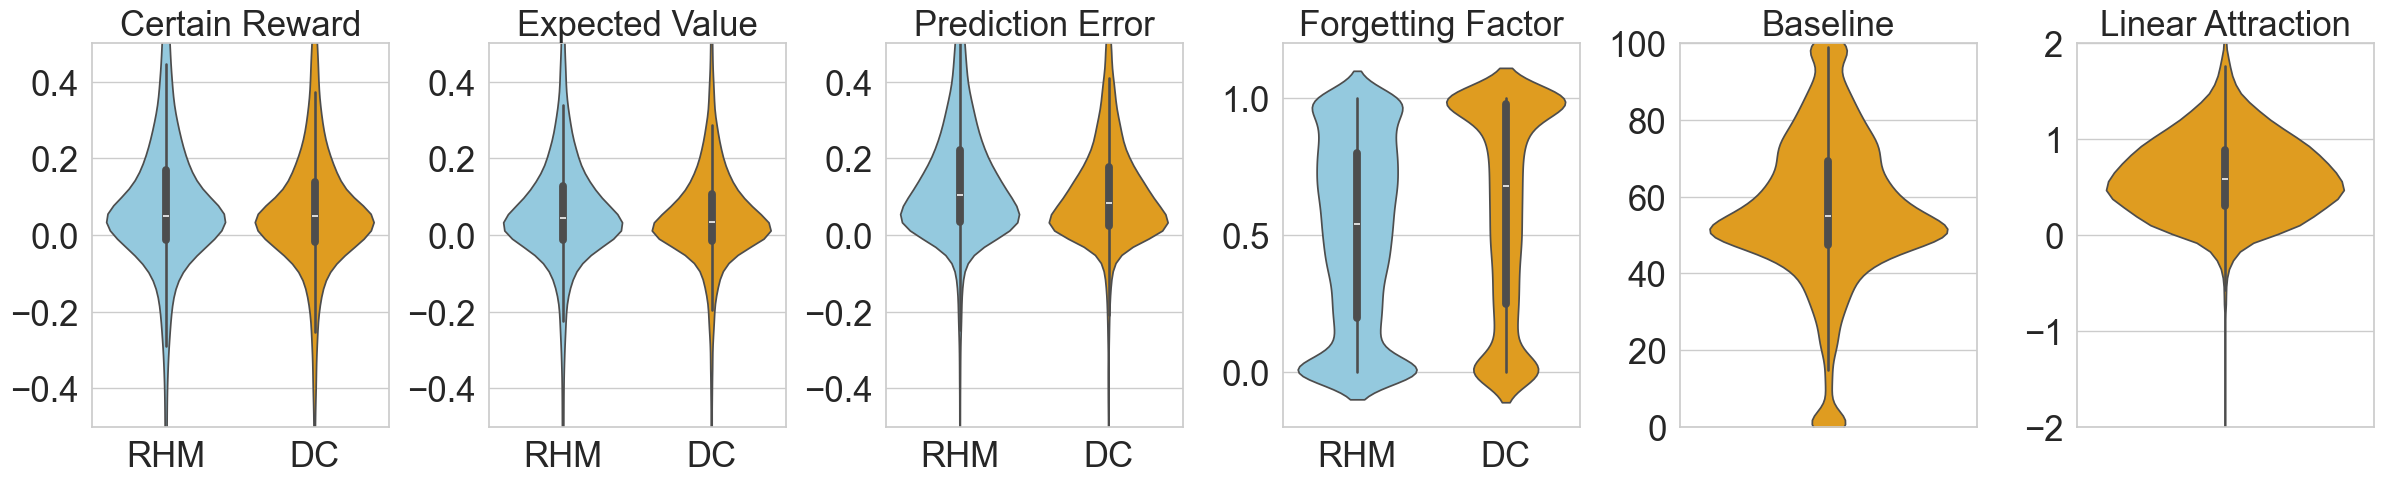

In [6]:
# generate violin plots

# arameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor']
dynonly_params = ['Baseline', 'Linear Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DC')
])


palette = {'RHM': 'skyblue', 'DC': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=25)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=25)
    axes[i].tick_params(axis='x', labelsize=25)

# plot DynAffect-only parameters (Baseline, Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=25)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=25)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([-2, 2])

plt.tight_layout()
plt.savefig('../Figures/violin_linear.png', dpi=1200)
plt.show()

## Non-Differential

In [7]:
# parameter statistics

RAll = pd.read_csv('../Outputs/Lmfit_RHM_NonDif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC', 'R^2']

print('Average RHM Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_Linear_NonDif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Baseline', 'Forgetting Factor', 'Linear Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))

Average RHM Weights
Certain Reward Mean: 0.0854123141585772
Certain Reward Median: 0.05
Certain Reward SD: 0.26527238455638813
Expected Value Mean: 0.06480088605321617
Expected Value Median: 0.04522064698989145
Expected Value SD: 0.1876665220188145
Prediction Error Mean: 0.14951044786895687
Prediction Error Median: 0.10637212305815799
Prediction Error SD: 0.1983978351434879
Forgetting Factor Mean: 0.5577920329467816
Forgetting Factor Median: 0.6221170970357048
Forgetting Factor SD: 0.3429986770218225
Baseline Mean: 58.34126301481632
Baseline Median: 55.89538609928442
Baseline SD: 16.37558555593237
BIC Mean: 46.15508952646876
BIC Median: 46.13814234195664
BIC SD: 19.08539062840041
R^2 Mean: 0.6556986523741805
R^2 Median: 0.7046038947779205
R^2 SD: 0.21862446768906524


Average DynAffect-C Weights
Certain Reward Mean: 0.09120606558046583
Certain Reward Median: 0.053136020943488196
Certain Reward SD: 0.2730281966184687
Expected Value Mean: 0.06865653444187021
Expected Value Median: 0.0474

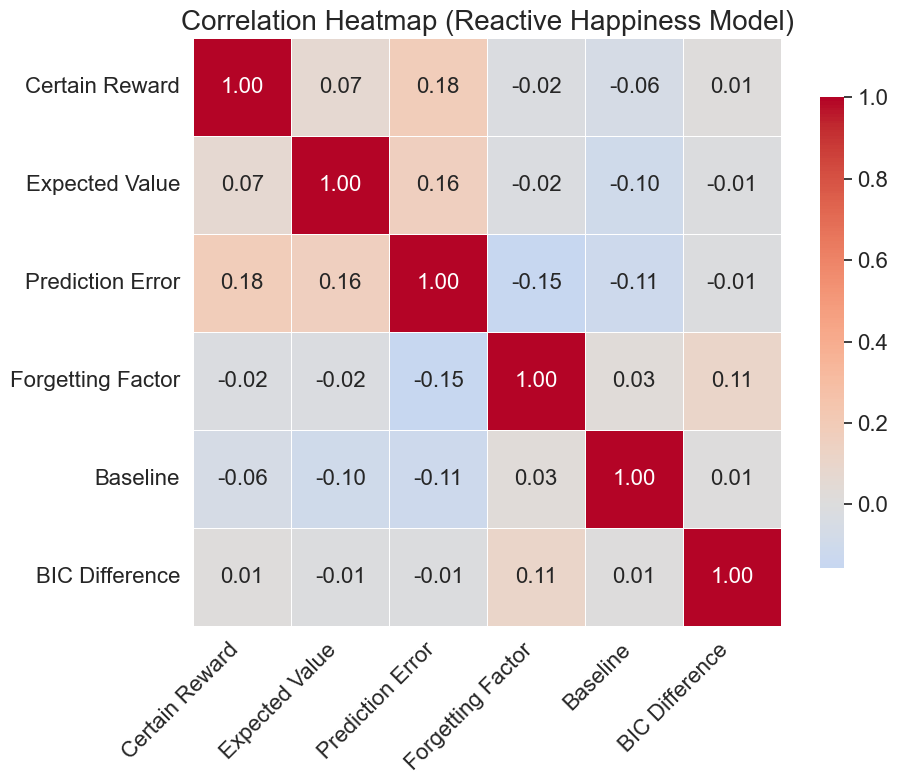

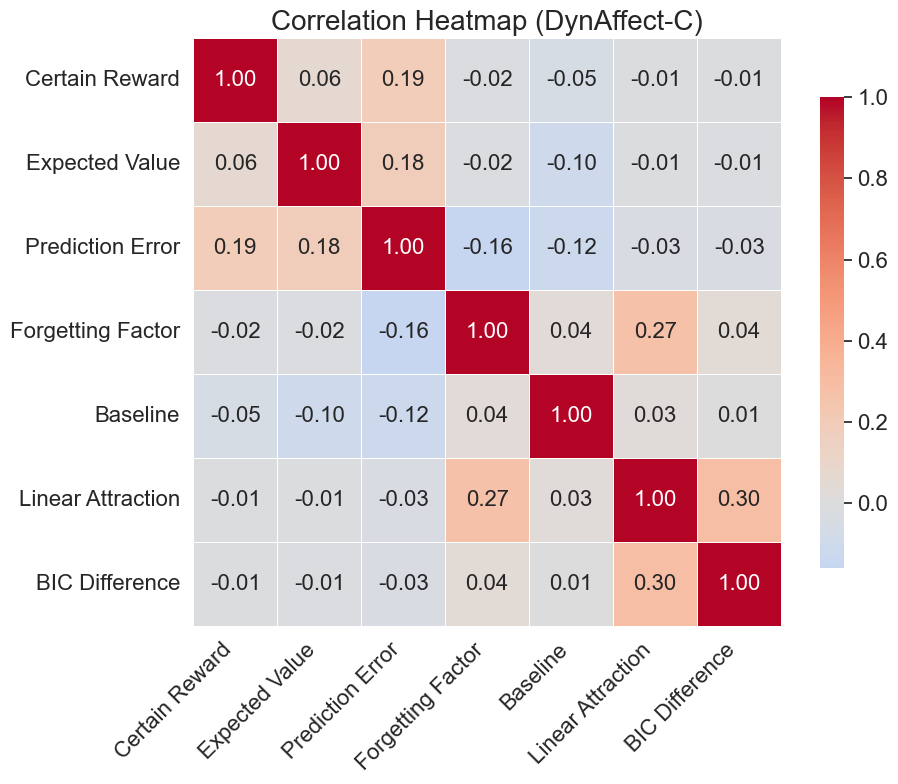

In [8]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation/p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval

    return corr_matrix, pval_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_NonDif_linear.png', dpi=1200)
    plt.show()

# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC Difference']
corr_matrix_rall, _, = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'BIC Difference']
corr_matrix_dcall, _, = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")

Median RHM R^2:  0.666777842909968
Median DC R^2:  0.7815788871437055
STD RHM R^2:  0.22391768511560206
STD RHM R^2:  0.17102722526383962
Median RHM BIC:  47.96645304399046
Median RHM BIC:  45.44492101798738
N =  3025
BIC Difference:  TtestResult(statistic=-17.952857179142626, pvalue=1.4621845692993857e-68, df=3024)


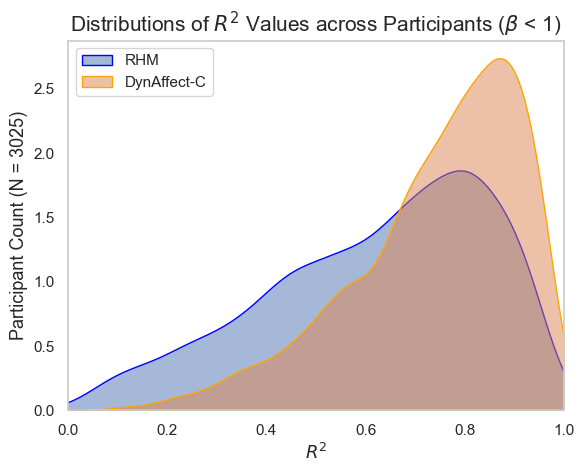

In [9]:
#filtered fits

list = {'Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'BIC', 'R^2'}
filtered = {'Certain Reward':[], 'Expected Value':[], 'Prediction Error':[], 'Forgetting Factor':[], 'Baseline':[], 'Linear Attraction':[], 'BIC':[], 'R^2':[]}

R_filtered = []
LA_filtered = []
R_BIC = []
LA_BIC = []

# filter participants with weak attraction dynamics
for i, j in enumerate(DCAll['Linear Attraction']):
    if j < 1:
        for k in list:
            filtered[k].append(DCAll[k][i])
        R_filtered.append(RAll['R^2'][i])
        LA_filtered.append(DCAll['R^2'][i])
        R_BIC.append(RAll['BIC'][i])
        LA_BIC.append(DCAll['BIC'][i])

print('Median RHM R^2: ', np.median(R_filtered))
print('Median DC R^2: ', np.median(LA_filtered))
print('STD RHM R^2: ',np.std(R_filtered))
print('STD RHM R^2: ',np.std(LA_filtered))
print('Median RHM BIC: ',np.median(R_BIC))
print('Median RHM BIC: ',np.median(LA_BIC))

R_filtered2 = [x for x in R_filtered if x > 0]
LA_filtered2 = [x for x in LA_filtered if x > 0]

print('N = ', len(R_filtered2))

sns.kdeplot(R_filtered2, alpha=0.5, fill=True, edgecolor='blue',
         label='RHM')
sns.kdeplot(LA_filtered2, alpha=0.5, fill=True, edgecolor='orange',
         label='DynAffect-C')
plt.title(r'Distributions of $R^2$ Values across Participants ($\beta$ < 1)', fontsize=15)
plt.xlabel('$R^2$', fontsize=13)
plt.ylabel(f'Participant Count (N = {len(R_filtered2)})', fontsize=13)

plt.legend()
plt.xlim(0,1)
plt.grid(False)
plt.savefig('../Figures/subset_linear.png', dpi=1200)

print('BIC Difference: ', stat.ttest_rel(LA_BIC, R_BIC))

Forgetting factor difference:  TtestResult(statistic=31.365991570664676, pvalue=4.583438283445021e-209, df=14629)


Text(0.5, 1.0, 'Forgetting Factor vs Linear Attraction (Non-Differential)')

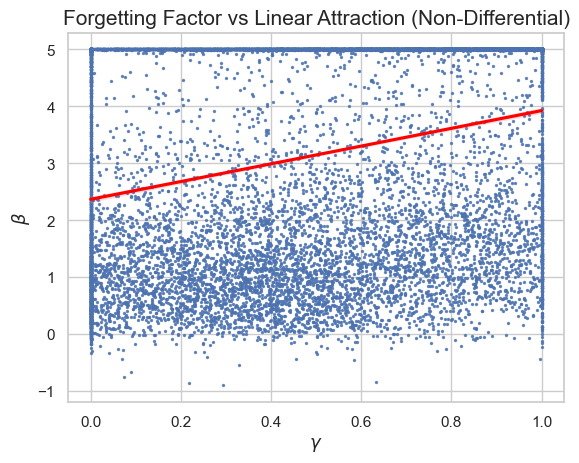

In [10]:
# forgetting factor analysis

print('Forgetting factor difference: ', stat.ttest_rel(RAll['Forgetting Factor'], DCAll['Forgetting Factor']))

sns.regplot(y=DCAll['Linear Attraction'], x=DCAll['Forgetting Factor'], line_kws={'color': 'red'}, scatter_kws={'s':2})
plt.xlabel(r'$\gamma$', fontsize=13)
plt.ylabel(r'$\beta$', fontsize=13)
plt.title('Forgetting Factor vs Linear Attraction (Non-Differential)', fontsize=15)

In [11]:
# calculate effect sizes

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
cubic = pd.read_csv('../Outputs/Lmfit_DC_NonDif.csv')
print(f"Cohen's d (change in forgetting factor): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
print(f"Cohen's d (change in BIC vs Cubic DynAffect-C): {cohen_d(DCAll['BIC'], cubic['BIC']):.3f}")
print(f"Cohen's d (change in variance explained): {cohen_d(DCAll['R^2'], RAll['R^2']):.3f}")
print(f"Cohen's d (change in variance explained): {cohen_d(LA_filtered2, R_filtered2):.3f}")

BIC Difference:  TtestResult(statistic=22.594824632519746, pvalue=3.852388956667002e-111, df=14629)
Forgetting Factor:  TtestResult(statistic=-31.365991570664676, pvalue=4.583438283445021e-209, df=14629)
Cohen's d (change in forgetting factor): -0.209
Cohen's d (change in BIC vs Cubic DynAffect-C): -0.074
Cohen's d (change in variance explained): 0.155
Cohen's d (change in variance explained): 0.600


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_54889/1641375415.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_54889/1641375415.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_54889/1641375415.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined

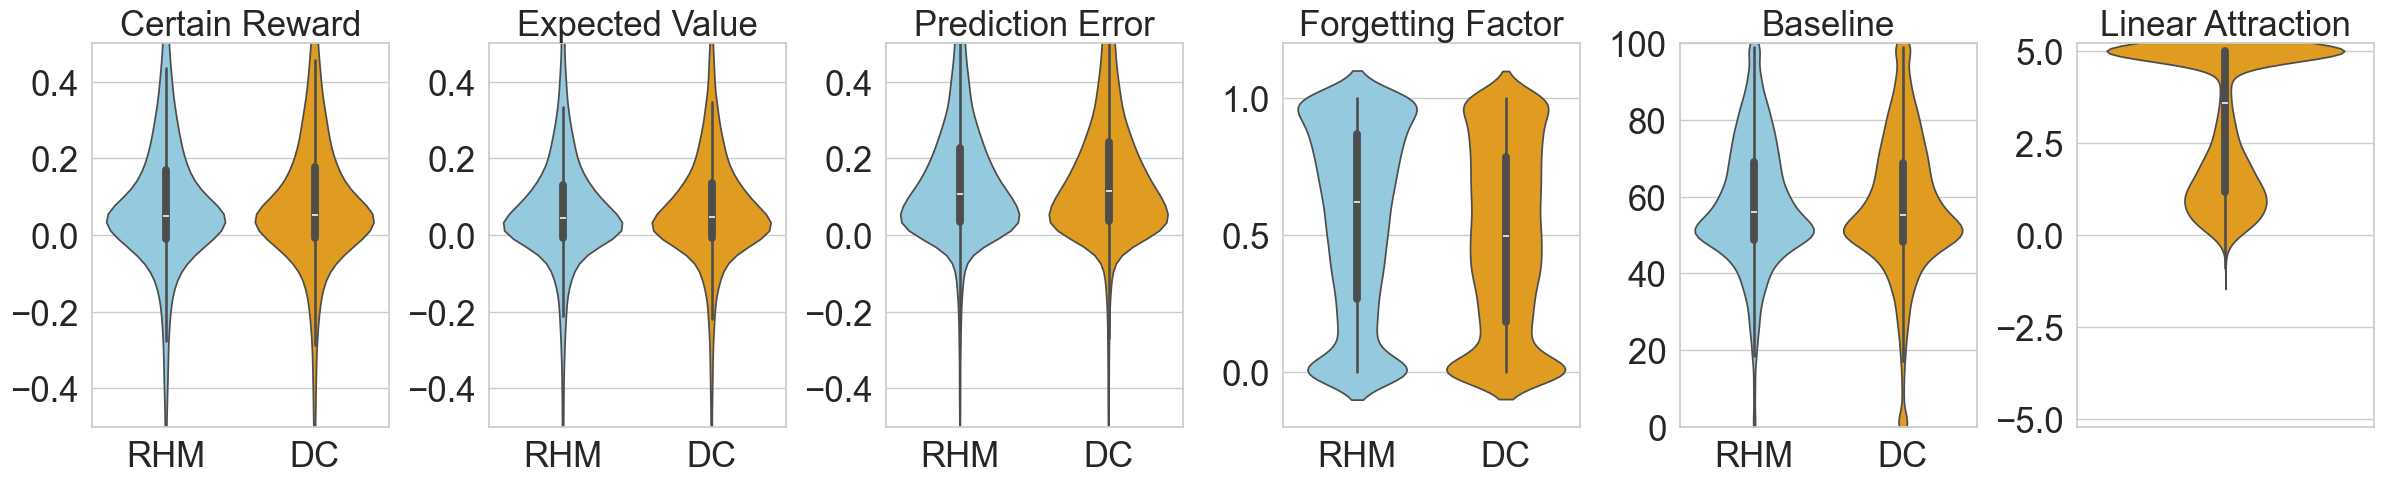

In [12]:
# generate violin plots

# parameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline']
dynonly_params = ['Linear Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DC')
])


palette = {'RHM': 'skyblue', 'DC': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=25)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=25)
    axes[i].tick_params(axis='x', labelsize=25)

# plot DynAffect-only parameters (Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=25)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=25)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([-5.2, 5.2])

plt.tight_layout()
plt.savefig('../Figures/violin_NonDif_linear.png', dpi=1200)
plt.show()